# Logistic Regression

## Classification
`Classification` is a predictive modeling task where the target variable $y$ takes on a small number of `discrete values` (labels), rather than continuous ranges.

### Binary Classification.
The simplest form is `binary classification`, where $y\in {\{0,1\}}$.
- **0 (Negative Class)**: Often denoted by "-" (e.g., "Not Spam").
- **1 (Positive Class)**: Often denoted by "+" (e.g., "Spam").

### Why Linear Regression Fails
While it is tempting to use `Linear Regression` and apply a threshold (e.g., mapping predictions > 0.5 to 1), this is generally ineffective.
- **No-Linearity**: Classification data doesn't follow a straight line.
- **Outliers**: Linear regression is hightly sensitive to outliers, which can shift the decision boundary and lead to incorrect predictions.
- **Invalid Range**: Linear regression can predict values far outside the $[0,1]$ range, which makes little sense for probability-based classification.

### Key Terminology
- **Feature $(x^{(i)})$**: The input variable used to make a prediction (e.g., words in an email).
- **Label $(y^{(i)})$**: The actual class or category assigned to a training example.
- **Multi-class**: A generalization of binary classification where y can take on more than two discrete values (e.g., classifying an image as a "dog", "cat", "bird").

## Hypothesis Representation
To ensure predictions stay within the valid range for classification $(0\le h_\theta(x)\le 1)$, we transition from linear regression to `Logistic Regression` by using the `Sigmoid Function` (also known as the `Logistic Function`).

### The Sigmoid Function (Logistic Function)
The linear prediction $z=\theta^Tx$ is plugged into the sigmoid function $g(z)$ to map any real number to a value between 0 and 1.
$$
g(z)=\frac{1}{1+e^{-z}}=\frac{1}{1+e^{-(\theta^Tx)}}
$$

### The Hypethesis Model
The resulting hypethesis $h_\theta(x)$ represents the `probability` that the output $y$ is equal to 1, given the input $x$ and parameter $\theta$:
$$
h_\theta(x)=g(\theta^Tx)=P(y=1|x;\theta)
$$

### Probability Interpretation
Because the total probability must equal 1, the likehood of each class if complementary:
- **Probability** $y=1:h_\theta(x)$
- **Probability** $y=0:1-h_\theta(x)$

> **Example**: If $h_\theta(x)=0.7$, there is a **70%** chance the label is 1 and a **30%** chance it is 0.

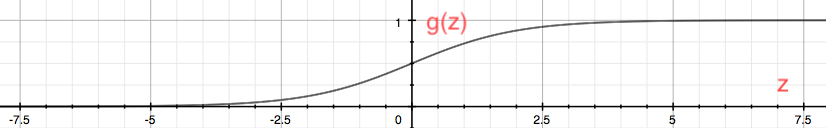

## Decision Boundry Summary
The `Decision Boundry` is the line (or surface) that separates different classes in a classification problem. It is determined by the hypothesis function and the chosen threshold.

### The Threshold Logic
To make a discrete prediction $(y=0\ or\ y=1)$, we apply a threshold to the logistic function $g(z)=h_\theta(x)$. For a standard threshold of 0.5:
- **Predict** $y=1$ when $h_\theta(x)=g(\theta^Tx)\ge 0.5$
- **Predict** $y=0$ when $h_\theta(x)=g(\theta^Tx)<0.5$

### Role of the Linear Predictor
Since $g(z)\ge 0.5$ whenever $z\ge 0$, the decision depends entirely on the sign of the input $\theta^Tx$:
- $y=1\ if\ h_\theta(x)=\theta^Tx\ge 0$
- $y=0\ if\ h_\theta(x)=\theta^Tx<0$

The equation $\theta^Tx=0$ defines the `Decision Boundary` itself.


### Shapes of Boundaries
The boundary does not have to be a straight line. Its shape depends on the features included in $\theta^Tx$:
- **Linear Boundaries**: Create by simple linear combinations (e.g., $x_1+x_2=5$).
- **Non-linear Boundaries**: Created by using polynomial features (e.g., $x_1^2+x_2^2=1$ creates a `circular` boundary).

>**Example**: 
>$$Given:\ \theta=\begin{bmatrix}
5\\
-1\\
0\\
\end{bmatrix},h_\theta(x)=g(z)=g(\theta^Tx)=g(\theta_0+\theta_1x_1+\theta_2x_2)\\
Predict:\ y=1,\\
Mean\ h_\theta(x)=g(z)=g(\theta^Tx)\ge 0.5\\
if:\ z=\theta^Tx=5+(-1).x_1+0.x_2\ge0\\
=>[5-x_1]>0\\
=>-x_1\ge -5\\
x_1\le 5
$$
This results the `decision boundary` of $h_\theta(x)$ in a `vertical line` at $x_1=5$, where everything to the left is classified as the positive class.


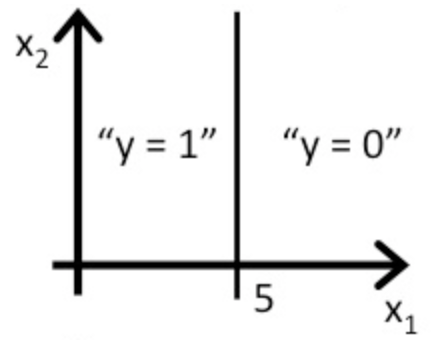

Other example:
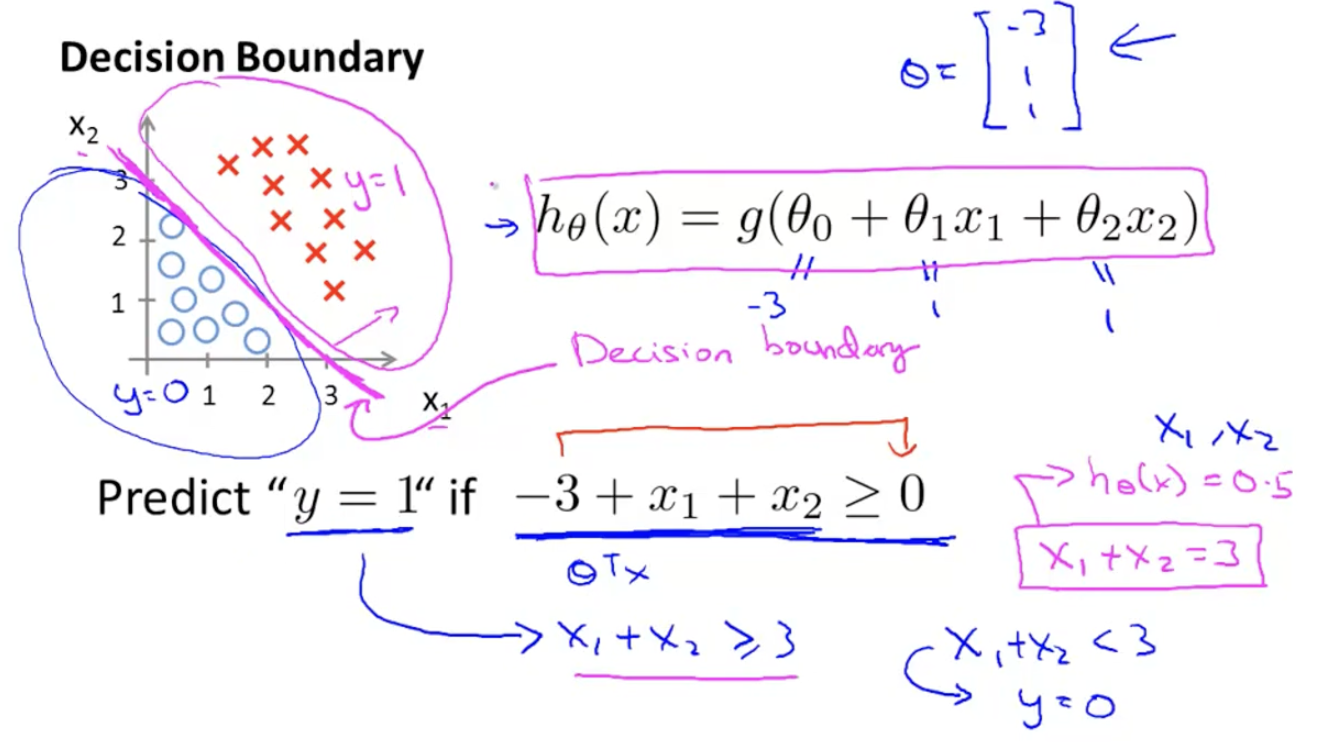

## Cost Function of Logistic Regression
We cannot use the `Mean Squared Error` (from linear regression) for logistic regression because the sigmoid mapping makes the cost function `non-convex` (wavy), leading to multiple local optima. Instead, we use a logarithmic cost function to ensure `convexity`.

### The Logistic Cost Function
The cost for a single training example is defined separately for each class:
$$
\text{Cost}(h_\theta(x),y)=
\begin{cases}
-\log(h_\theta(x)) & \text{if } y=1\\
-\log(1-h_\theta(x)) & \text{if } y=0
\end{cases}\\
\text{Cost}(h_\theta(x),y)=-y.log(h_\theta(x)) - (1-y).log(1-h_\theta(x))
$$

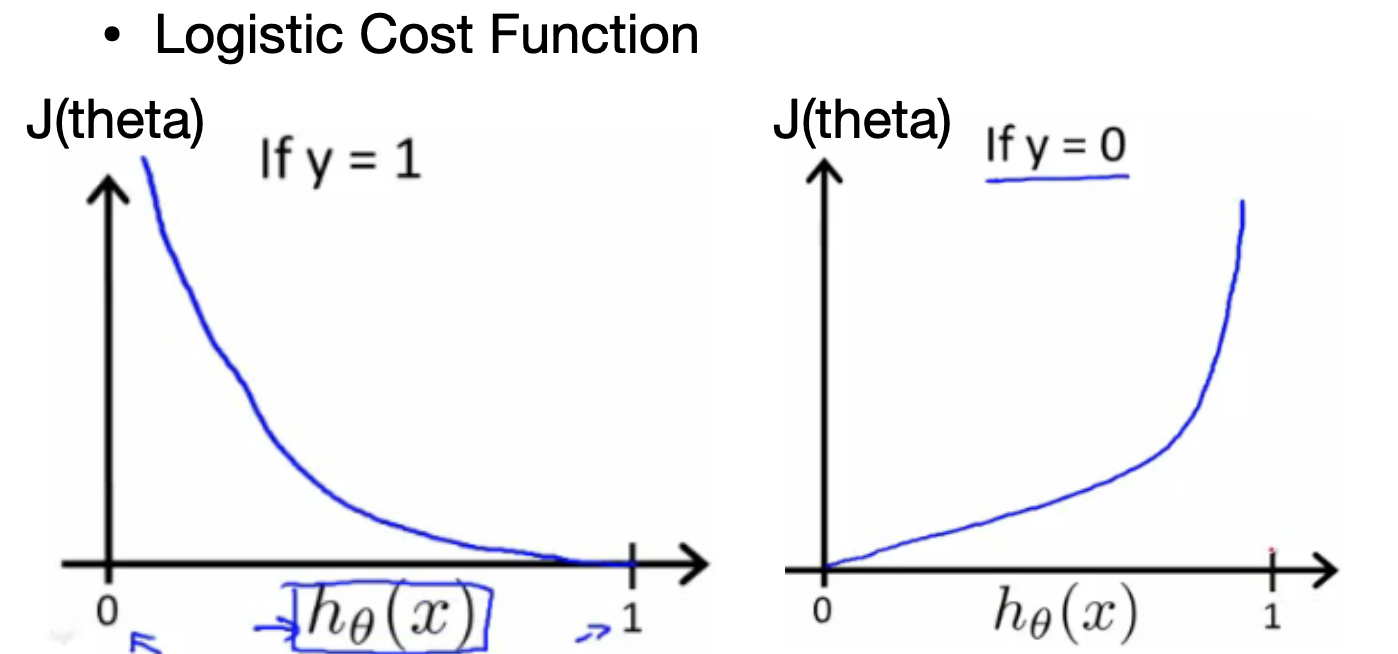

### Intuition and Behavior
This function penalizes the model based on how far the prediction is from the actual label:
- When $y=1$:
    - If $h_\theta(x)=1,\ Cost=0$ (Perfect prediction).
    - As $h_\theta(x)\rightarrow0,\ Cost\rightarrow+\infty$ (Severe penalty for being wrong).
- When $y=0$:
    - If $h_\theta(x)=0,\text{ Cost}=0$ (Perfect prediction).
    - As $h_\theta(x)\rightarrow1,\text{ Cost}\rightarrow+\infty$ (Severe penalty for being wrong).

### Why Use Logs Function?
- **Convexity**: It guarantees a single global minimum, allowing `Gradient Descent` to find the optimal $\theta$ reliably.
- **Error Amplification**: The logarithmic scale ensures that if the model is highly confident in the wrong class, the cost increases exponentially.

> **Example**: If the actual label is spam $(y=1)$:
>- but the module predicts a 0.01 probability of spam, $\rightarrow$ the cost will be very **high** $(-log(0.01)\approx4.6)$.
>- if it predicts 0.99, $\rightarrow$ the cost is **near zero** $(-log(0.99)\approx0.01)$.

## Simplified Cost Function and Gradient Descent

### Simplified Cost Function
The compressed form of the Logistic Cost Function. By using the labels $y\in {0,1}$ as switches, we can write the cost for one example as:
$$
Cost(h_\theta(x),y)=-y.log(h_\theta(x))-(1-y).log(1-h_\theta(x))
$$
- If $y=1$: the (1-y) term becomes zero.
- If $y=0$: the $y$ term becomes zero.

The `complete cost function` for all $m$ examples is:
$$
J(\theta)=-\frac{1}{m}\sum_{i=1}^{m}\begin{bmatrix}y^{(i)}.log(h_\theta(x^{(i)}))+(1-y^{(i)}).log(1-h_\theta(x^{(i)}))\end{bmatrix}
$$

### Gradient Descent for Logistic Regression
To minimize $J(\theta)$, we update the parameters $\theta$ interatively:
$$
\text{Repeat: }\\\theta_j:=\theta_j-\alpha\frac{\partial}{\partial\theta_j}J(\theta)\\
=\theta_j-\frac{\alpha}{m}\sum_{i=1}^{m}(h_\theta(x^{(i)})-y^{(i)}).x_j^{(i)}
$$

>**Key Observation**: This update rule looks identical to `Linear Regression`. However, it is fundamentally different because the hypothesis $h_\theta(x)$ is now the `sigmoid function` "$g(\theta^Tx)$" instead of a linear one.

### Vectorized Implementation
For efficient computation, we can perform these operations on entire matrices at once:
- Cost Function:
$$
h=g(X\theta)\\
J(\theta)=\frac{1}{m}.(-y^T.log(h)-(1-y)^T.log(1-h))
$$
- Gradient Descent Update:
$$
\theta:=\theta-\frac{\alpha}{m}X^T(g(X\theta)-y)
=\theta-\alpha\frac{1}{m}\sum_{i=1}^{m}[(h_\theta(x^{(i)})-y^{(i)}).x^{(i)}]
$$

## Advanced Optimization
Advanced optimization algorithms like:
- Conjugate Gradient
- BFGS (Broyden-Fletcher-Goldfarb-Shanno)
- L-BFGS (Limited-memory Broyden-Fletcher-Goldfarb-Shanno)

These algorithms offer faster and more sophisticated alternatives to standard Gradient Descent. Instead of manually tuning a learning rate $\alpha$, these algorithms use internal logic to converge more efficiently.

### Key Advantages:
- **No need to manually pick $\alpha$**: These algorithms often use a line search to find a good step size automatically.
- **Speed**: They typically converge much faster than standard Gradient Descent, especially on complex surfaces.

### Strategy: Use Libraries
Unless you are an expert in numerical computing, you should **use pre-existing libraries** (like those in Octave/MATLAB or Python) to implement these. They are highly optimized, stable, and extensively tested.


### Implementation Requirements
To use these advanced solvers, you must provide a function that calculates two things for any given $\theta$:
- The Cost Function: $J(\theta)$
- The Gradient: $\frac{\partial}{\partial\theta_j}J(\theta)$ for all $j$

### Syntax Example (Octave)
In Octave, you can use the `fminunc` (Function Minimization Unconstrained) solver.

**Setup the Options:**
```matlab
% Defining your `costFunction`.
function [jVal, gradient]=costFunction(theta)
    jVal=[...code to compute J(theta)...];
    gradient=[...code to compute derivative of J(theta)...];
end;
```
```matlab
% Run the solver
% ['GradObj', 'on']: tells the solver you are providing the gradient.
% ['MaxIter', 100]: sets the limit to 100 iterations (must be an integer).
options = optimset('GradOjb','on','MaxIter', 100);
initialTheta=zeros(2,1);
[optTheta, functionVal, exitFlag]=fminunc(@costFunction, initialTheta,options);
```



## Multiclass Classification: One-vs-all
**One-vs-All** (also known as One-vs-Rest) is a method that allows us to use binary logistic regression for problems with multiple categories $(y\in\{0,1,\cdots,n\})$.

**Summary of Step**:
- **Train**: Create $n+1$ logistic regression models, one for each class.
- **Predict**: Evaluate all models on a new input and select the one with the hightest confidence value.

### Core Strategy
Instead of trying to differentiate all classes at once, we break the problem into $n+1$ **separate binary classification problems**.
- 1. **Isolate one class**: For each class $i$, we treat it as the "positive" class and lump all other remaining classes into a single "nagative" class.
- 2. **Train a classifier**: We train a unique hypothesis $h_\theta^{(i)}(x)$ that predicts the probability that $y=i$ for that specific class.
    - $y\in\{0,1,\cdots,n\}$
    - $h_\theta^{(0)}(x)=P(y=0|x;\theta)$
    - $h_\theta^{(1)}(x)=P(y=1|x;\theta)$
    - $cdots$
    - $h_\theta^{(n)}(x)=P(y=n|x;\theta)$


### Making a Prediction
Once we have trained a classifier for every class, we provide a new input $x$ to all of them. To make final decision:
- Run every hypothesis $h_\theta^{(i)}(x).
- Pick the class $i$ that returned the **highest probability**:
$$
prediction=\max_i(h_\theta^{(i)}(x))
$$

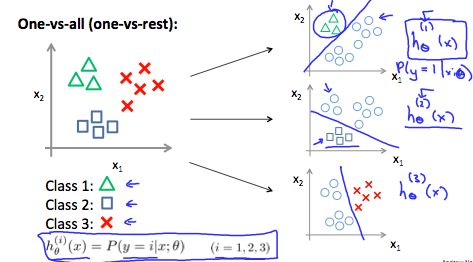